In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats
import statistics


def main():
    # Gathering diabetes the data
    diabetesDataFrame = pd.read_excel('2018_diabetes_data.xlsx')
    diabetesDataFrame = diabetesDataFrame.sort_values(
        '%diabetes', ascending=True)
    print("--------------2018-----Diabetes-----------------")
    print(diabetesDataFrame.head(5))
    diabetesArray = np.array(diabetesDataFrame)
    diabetesList = list(diabArray)

    # Gathering obesity data
    obesityDataFrame = pd.read_excel('2018_obesity_data.xlsx')
    obesityDataFrame = obesityDataFrame.sort_values('% OBESE', ascending=True)
    print("--------------2018------Obesity----------------")
    print(obesityDataFrame.head(5))
    obesityArray = np.array(obesityDataFrame)
    obesityList = list(obesityArray)

    inactivityDataFrame = pd.read_excel('2018_inactivity_data.xlsx')
    inactivityDataFrame = inactivityDataFrame.sort_values(
        '% INACTIVE', ascending=True)
    print("--------------2018---------Inactivity-------------")
    inactivityArray = np.array(inactivityDataFrame)
    inactivityList = list(inactivityArray)
    print(inactivityDataFrame.head(5))
    
if __name__ == "__main__":
    main()


--------------2018-----Diabetes-----------------
      YEAR   FIPS           COUNTY      STATEW  %diabetes
3138  2018  56039     Teton County     Wyoming        3.8
2980  2018  53055  San Juan County  Washington        4.5
2798  2018  49043    Summit County        Utah        4.8
1613  2018  30031  Gallatin County     Montana        5.0
1336  2018  27045  Fillmore County   Minnesota        5.0
--------------2018------Obesity----------------
     YEAR   FIPS           COUNTY     STATE  % OBESE
362  2018  56039     Teton County   Wyoming     10.5
18   2018   8013   Boulder County  Colorado     13.6
40   2018   8107     Routt County  Colorado     13.7
29   2018   8051  Gunnison County  Colorado     13.8
340  2018  49043    Summit County      Utah     14.2
--------------2018---------Inactivity-------------
      YEAR  FIPDS             COUNTY       STATE  % INACTIVE
95    2018   8035     Douglas County    Colorado         8.8
83    2018   8013     Boulder County    Colorado         9.4
689

In [21]:
# Find common counties(FIPS) in both the data
diabetesDataFrame = pd.read_excel('2018_diabetes_data.xlsx')
diabArray = np.array(diabetesDataFrame)
diabetesList = list(diabArray)

inactivityDataFrame = pd.read_excel('2018_inactivity_data.xlsx')
inactArray = np.array(inactivityDataFrame)
inactivityList = list(inactArray)

inactivityArray = []
diabetesArray = []

for fpsInactivity in inactivityList:
    for fpsDiabetes in diabetesList:
        if fpsDiabetes[1] == fpsInactivity[1]:
            inactivityArray.append(fpsInactivity[4])
            diabetesArray.append(fpsDiabetes[4])
print("Length of Inactivity Array",len(inactivityArray))
print("Length of diabetes Array",len(diabetesArray))
    
    

Length of Inactivity Array 1370
Length of diabetes Array 1370


In [129]:
# Diabetes Parameter
print("Diabetes Mean->",sum(diabetesArray)/len(diabetesArray))
print("Diabetes Median->",statistics.median(diabetesArray))
print("Diabetes Standard Deviation",statistics.stdev(diabetesArray))
print("Diabetes Skew",scipy.stats.skew(diabetesArray))
scipy.stats.kurtosis(diabetesArray, fisher=True)
mean = np.mean(diabetesArray)
std_dev = np.std(diabetesArray)
# Calculate kurtosis using the formula
n = len(diabetesArray)
kurtosis = (np.sum((diabetesArray - mean)**4) / (n * std_dev**4)) - 3
print("Diabetes kurtosis",kurtosis)

Diabetes Mean-> 7.1388429752066145
Diabetes Median-> 7.0
Diabetes Standard Deviation 0.7498845473745434
Diabetes Skew 0.0887760508265585
Diabetes kurtosis 2.756677928003814


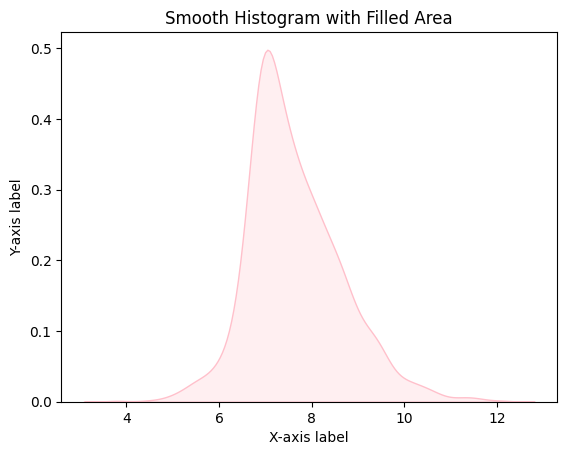

In [66]:

# Create a smooth histogram with a filled area
# plt.figure(figsize=(8, 6))
sns.kdeplot(diabetesArray, color='pink', fill=True)


# Customize the plotx
plt.title('Smooth Histogram with Filled Area')
plt.xlabel('Diabetes')
plt.ylabel('Data points')

# Show the plot
plt.show()

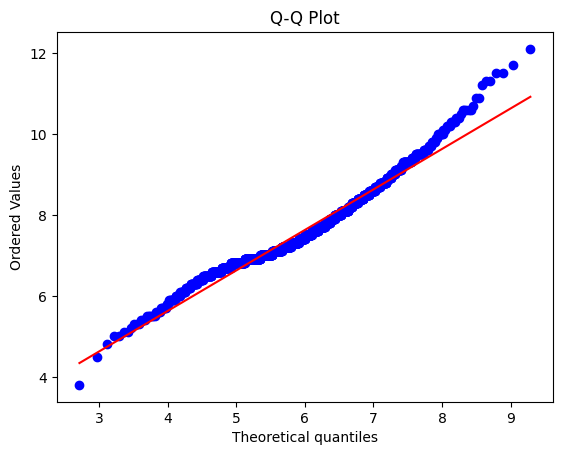

In [78]:
# qq plot for diabetes and inactivity
import matplotlib.pyplot as plt
from scipy import stats

# Create the Q-Q plot
stats.probplot(diabetesArray, dist=stats.norm(loc=6, scale=1),plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [80]:
print("Inactivity Mean",sum(inactivityArray)/len(inactivityArray));
print("Inactivity Median",statistics.median(inactivityArray));
print("Inactivity Standard Deviation",statistics.stdev(inactivityArray));
print("Inactivity Skew",scipy.stats.skew(inactivityArray));
scipy.stats.kurtosis(inactivityArray, fisher=True)

mean = np.mean(inactivityArray)
std_dev = np.std(inactivityArray)

# Calculate kurtosis using the formula
n = len(inactivityArray)
kurtosis = (np.sum((inactivityArray - mean)**4) / (n * std_dev**4)) - 3
print("Inactivity kurtosis",kurtosis)

Inactivity Mean 16.543357664233575
Inactivity Median 16.7
Inactivity Standard Deviation 1.9260098438825033
Inactivity Skew -0.34204159975018034
Inactivity kurtosis -0.5490325254959423


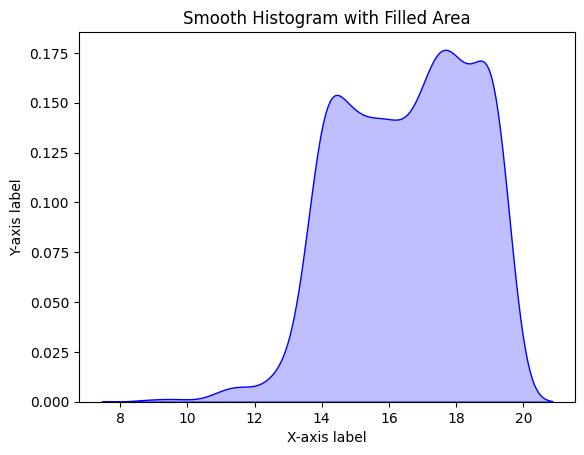

In [81]:
# Create a smooth histogram with a filled area
# plt.figure(figsize=(8, 6))
sns.kdeplot(inactivityArray, color='blue', fill=True)


# Customize the plotx
plt.title('Smooth Histogram with Filled Area')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the plot
plt.show()

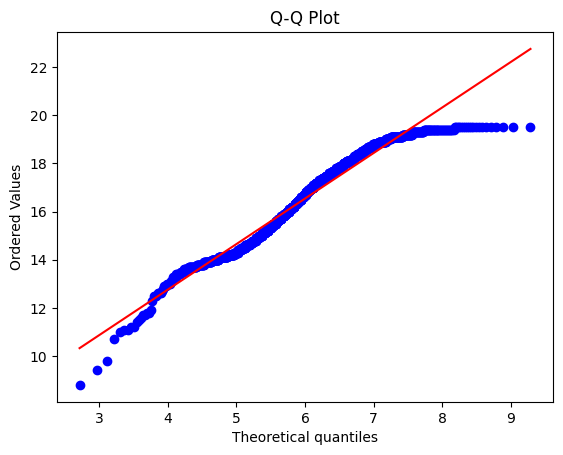

In [82]:
# qq plot for diabetes and inactivity
import matplotlib.pyplot as plt
from scipy import stats

# Create the Q-Q plot
stats.probplot(inactivityArray, dist=stats.norm(loc=6, scale=1),plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [83]:
# Checking correlation between %diabetes and %Inactivity
import numpy as np
from scipy import stats



# Calculate the Pearson correlation coefficient (r) using numpy
correlation_coefficient = np.corrcoef(diabetesArray, inactivityArray)[0, 1]

# Calculate the correlation coefficient and p-value using scipy
correlation, p_value = stats.pearsonr(diabetesArray, inactivityArray)

# Display the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("Pearson Correlation Coefficient (with p-value):", correlation)
print("p-value:", p_value)

# Interpret the correlation strength
if abs(correlation) < 0.3:
    print("The correlation is weak.")
elif 0.3 <= abs(correlation) < 0.7:
    print("The correlation is moderate.")
else:
    print("The correlation is strong.")

Pearson Correlation Coefficient: 0.441706008168227
Pearson Correlation Coefficient (with p-value): 0.44170600816822636
p-value: 1.6342382824668403e-66
The correlation is moderate.


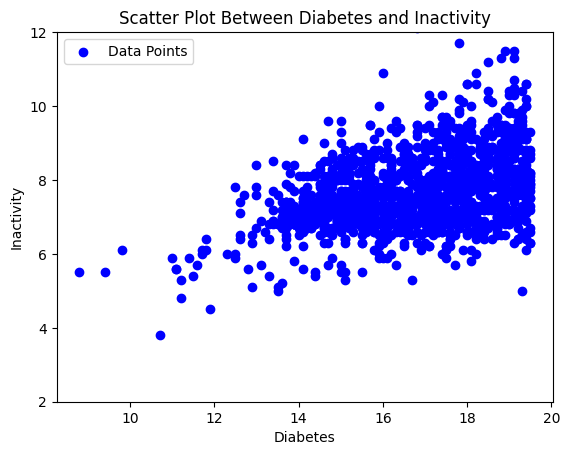

In [86]:
# Create a scatter plot between %diabetes and %inactivity
plt.scatter(inactivityArray, diabetesArray, c='blue', marker='o', label='Data Points')

# Add labels and a title
plt.xlabel('Diabetes')
plt.ylabel('Inactivity')
plt.title('Scatter Plot Between Diabetes and Inactivity')


plt.ylim(2, 12)
# Add a legend (if needed)
plt.legend()

# Display the plot
plt.show()

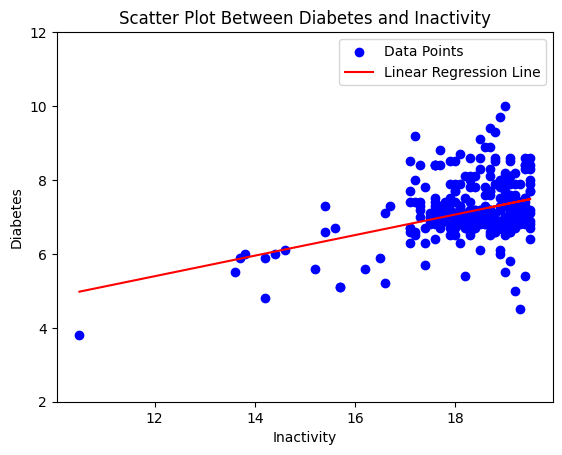

In [134]:
# Create a scatter plot between %diabetes and %inactivity
plt.scatter(inactivityArray, diabetesArray, c='blue', marker='o', label='Data Points')



slope, intercept = np.polyfit(inactivityArray, diabetesArray, 1)

# Add a linear regression line
regression_line = [slope * x + intercept for x in inactivityArray]
plt.plot(inactivityArray, regression_line, color='red', label='Linear Regression Line')



# Add labels and a title
plt.xlabel('Inactivity')
plt.ylabel('Diabetes')
plt.title('Scatter Plot Between Diabetes and Inactivity')
plt.ylim(2, 12)
# Add a legend (if needed)
plt.legend()

# Display the plot
plt.show()


In [94]:
# Calculate r square value's

# it is important to convert normal array's to numpy's array
inactivityArray = np.array(inactivityArray)
diabetesArray = np.array(diabetesArray)



slope, intercept = np.polyfit(inactivityArray, diabetesArray, 1)



# Calculate the predicted values
predicted_values = [slope * x + intercept for x in inactivityArray]

# Calculate the residuals
residuals = array2 - predicted_values

# Calculate the total sum of squares (TSS)
mean_array2 = np.mean(diabetesArray)
TSS = np.sum((diabetesArray - mean_array2) ** 2)

# Calculate the residual sum of squares (RSS)
RSS = np.sum((diabetesArray - predicted_values) ** 2)

# Calculate R-squared (coefficient of determination)
R_squared = 1 - (RSS / TSS)
print(R_squared)

0.19510419765190978


R-squared (Coefficient of Determination): 0.1951041976519099


/var/folders/57/d62b3m654078xq_frsk2ht3r0000gn/T/ipykernel_50386/2506436076.py:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(predicted_values, residuals, basefmt=" ", linefmt="-", markerfmt="1", use_line_collection=True)


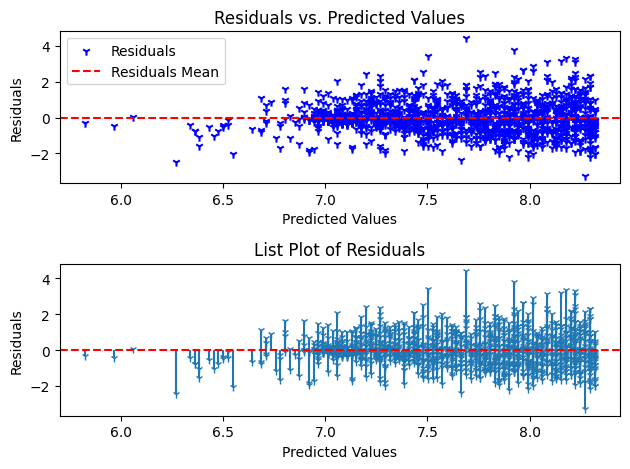

In [106]:
# Create a scatter plot of residuals


# it is important to convert normal array's to numpy's array
inactivityArray = np.array(inactivityArray)
diabetesArray = np.array(diabetesArray)

slope, intercept = np.polyfit(inactivityArray, diabetesArray, 1)



# Calculate the predicted values
predicted_values = [slope * x + intercept for x in inactivityArray]

# Calculate the residuals
residuals = diabetesArray - predicted_values

# Scatter plot of residuals vs. predicted values
plt.subplot(2, 1, 1)
plt.scatter(predicted_values, residuals, c='blue', marker='1', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.legend()

# List plot of residuals
plt.subplot(2, 1, 2)
plt.stem(predicted_values, residuals, basefmt=" ", linefmt="-", markerfmt="1", use_line_collection=True)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('List Plot of Residuals')


plt.tight_layout()

# Display the R-squared value
print("R-squared (Coefficient of Determination):", 1 - np.var(residuals) / np.var(diabetesArray))
plt.show()

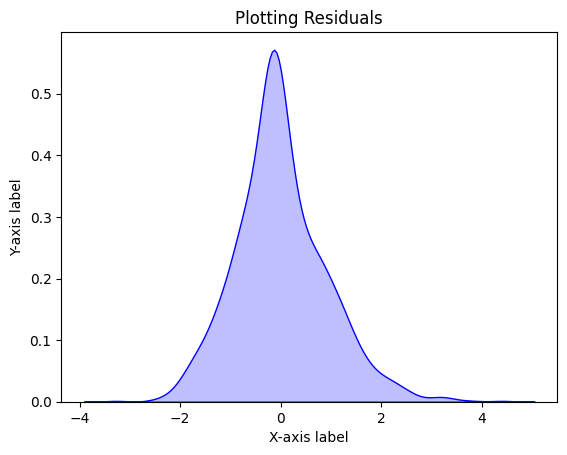

In [108]:
# Plot residuals
# plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', fill=True)


# Customize the plotx
plt.title('Plotting Residuals')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the plot
plt.show()

In [110]:
print("residuals Mean",sum(residuals)/len(residuals));
print("residuals Median",statistics.median(residuals));
print("residuals Standard Deviation",statistics.stdev(residuals));
print("residuals Skew",scipy.stats.skew(residuals));
scipy.stats.kurtosis(residuals, fisher=True)

mean = np.mean(residuals)
std_dev = np.std(residuals)

# Calculate kurtosis using the formula
n = len(residuals)
kurtosis = (np.sum((residuals - mean)**4) / (n * std_dev**4)) - 3
print("residuals kurtosis",kurtosis)

residuals Mean -5.194871297121973e-15
residuals Median -0.08187603928179232
residuals Standard Deviation 0.9117635695540478
residuals Skew 0.5111071710808831
residuals kurtosis 1.076496839740618


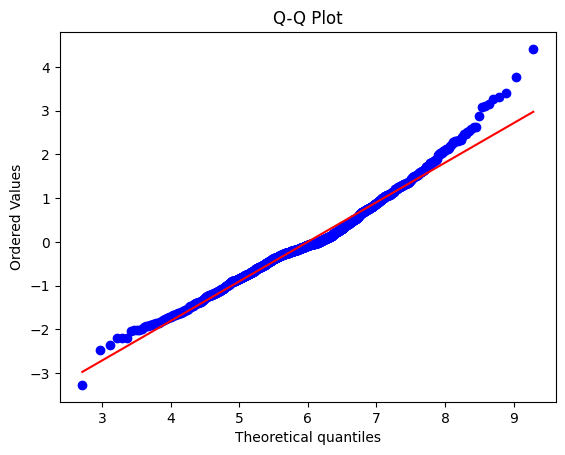

In [111]:
# qq plot for residuals
import matplotlib.pyplot as plt
from scipy import stats

# Create the Q-Q plot
stats.probplot(residuals, dist=stats.norm(loc=6, scale=1),plot=plt)
plt.title('Q-Q Plot')
plt.show()

R-squared (Coefficient of Determination): 0.19510419765190978


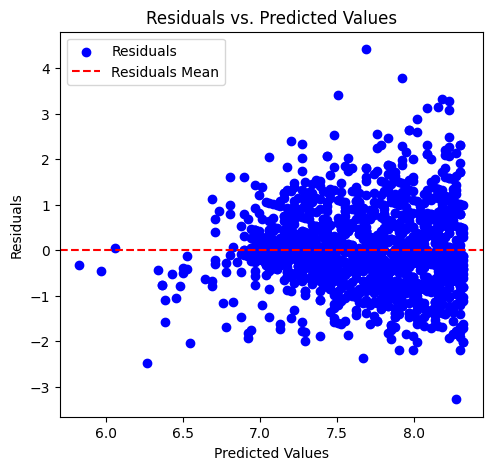

In [115]:

# it is important to convert normal array's to numpy's array
inactivityArray = np.array(inactivityArray)
diabetesArray = np.array(diabetesArray)
# Calculate the least squares linear regression coefficients
slope, intercept = np.polyfit(inactivityArray, diabetesArray, 1)

# Calculate the predicted values
predicted_values = slope * inactivityArray + intercept

# Calculate the residuals
residuals = diabetesArray - predicted_values

# Calculate the total sum of squares (TSS)
mean_array2 = np.mean(diabetesArray)
TSS = np.sum((diabetesArray - mean_array2) ** 2)

# Calculate the residual sum of squares (RSS)
RSS = np.sum(residuals ** 2)

# Calculate R-squared (coefficient of determination)
R_squared = 1 - (RSS / TSS)

# Create a scatter plot
plt.figure(figsize=(12, 5))

# Scatter plot of residuals vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(predicted_values, residuals, c='blue', marker='o', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.legend()



# Display the R-squared value
print("R-squared (Coefficient of Determination):", R_squared)

In [120]:
# Finding common FIPS
# Find common counties(FIPS) in both the data
diabetesDataFrame = pd.read_excel('2018_diabetes_data.xlsx')
diabArray = np.array(diabetesDataFrame)
diabetesList = list(diabArray)

obesityDataFrame = pd.read_excel('2018_obesity_data.xlsx')
obesityArray = np.array(obesityDataFrame)
obesityList = list(obesityArray)
# print(obesityList)
obesityArray = []
diabetesArray = []
for fpsObesity in obesityList:
    for fpsDiabetes in diabetesList:
        if fpsDiabetes[1] == fpsObesity[1]:
            obesityArray.append(fpsObesity[4])
            diabetesArray.append(fpsDiabetes[4])
print("Length of Obesity Array",len(obesityArray))
print("Length of Diabetes Array",len(diabetesArray))

Length of Obesity Array 363
Length of Diabetes Array 363


In [127]:
print("Obesity Mean",sum(obesityArray)/len(obesityArray));
print("Obesity Median",statistics.median(obesityArray));
print("Obesity Standard Deviation",statistics.stdev(obesityArray));
print("Obesity Skew",scipy.stats.skew(obesityArray));
print(scipy.stats.kurtosis(obesityArray, fisher=True))

Obesity Mean 18.264738292011028
Obesity Median 18.3
Obesity Standard Deviation 1.038311222009406
Obesity Skew -2.6850558229853996
12.322509149363517
Obesity kurtosis 12.322509149363523


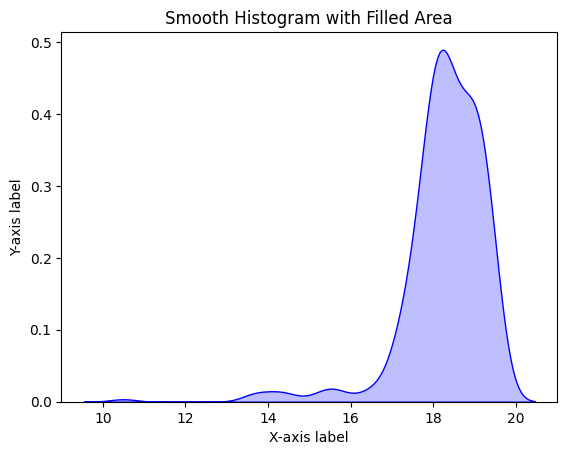

In [122]:
# Create a smooth histogram with a filled area
# plt.figure(figsize=(8, 6))
sns.kdeplot(obesityArray, color='blue', fill=True)


# Customize the plotx
plt.title('Smooth Histogram with Filled Area')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the plot
plt.show()

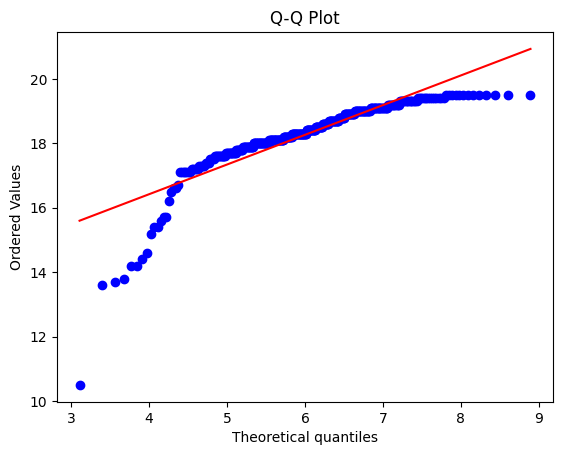

In [123]:
# qq plot for diabetes and inactivity
import matplotlib.pyplot as plt
from scipy import stats

# Create the Q-Q plot
stats.probplot(obesityArray, dist=stats.norm(loc=6, scale=1),plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [124]:
# Checking correlation between %diabetes and %Inactivity
import numpy as np
from scipy import stats



# Calculate the Pearson correlation coefficient (r) using numpy
correlation_coefficient = np.corrcoef(diabetesArray, obesityArray)[0, 1]

# Calculate the correlation coefficient and p-value using scipy
correlation, p_value = stats.pearsonr(diabetesArray, obesityArray)

# Display the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("Pearson Correlation Coefficient (with p-value):", correlation)
print("p-value:", p_value)

# Interpret the correlation strength
if abs(correlation) < 0.3:
    print("The correlation is weak.")
elif 0.3 <= abs(correlation) < 0.7:
    print("The correlation is moderate.")
else:
    print("The correlation is strong.")

Pearson Correlation Coefficient: 0.38532576998030654
Pearson Correlation Coefficient (with p-value): 0.3853257699803062
p-value: 2.6976807446678427e-14
The correlation is moderate.


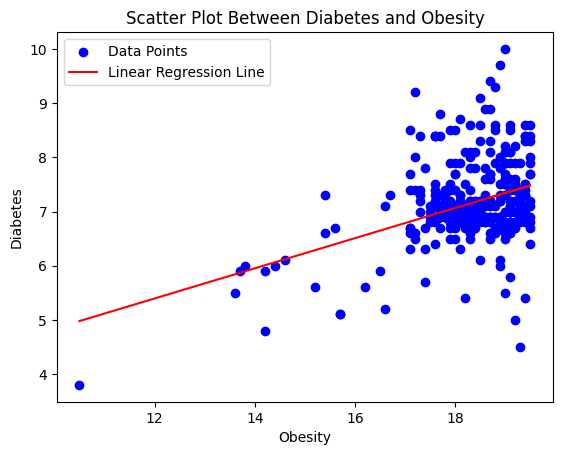

In [135]:
# Create a scatter plot between %diabetes and %inactivity
plt.scatter(obesityArray, diabetesArray, c='blue', marker='o', label='Data Points')



slope, intercept = np.polyfit(obesityArray, diabetesArray, 1)

# Add a linear regression line
regression_line = [slope * x + intercept for x in obesityArray]
plt.plot(obesityArray, regression_line, color='red', label='Linear Regression Line')



# Add labels and a title
plt.xlabel('Obesity')
plt.ylabel('Diabetes')
plt.title('Scatter Plot Between Diabetes and Obesity')
# plt.ylim(2, 12)
# Add a legend (if needed)
plt.legend()

# Display the plot
plt.show()

In [126]:
# Calculate r square value's

# it is important to convert normal array's to numpy's array
inactivityArray = np.array(obesityArray)
diabetesArray = np.array(diabetesArray)



slope, intercept = np.polyfit(inactivityArray, diabetesArray, 1)



# Calculate the predicted values
predicted_values = [slope * x + intercept for x in inactivityArray]

# Calculate the residuals
residuals = diabetesArray - predicted_values

# Calculate the total sum of squares (TSS)
mean_array2 = np.mean(diabetesArray)
TSS = np.sum((diabetesArray - mean_array2) ** 2)

# Calculate the residual sum of squares (RSS)
RSS = np.sum((diabetesArray - predicted_values) ** 2)

# Calculate R-squared (coefficient of determination)
R_squared = 1 - (RSS / TSS)
print(R_squared)

0.148475949010916
